# APURWA  ASHOK  KAMBLE

# TASK_1 :- Prediction Using Supervised ML(Simple Linear Regression     Model)

# Importing the libraries

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# Load the dataset


In [2]:
Hours = pd.read_csv("E:\Interenship\hours.csv")
print(Hours)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
Hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
Hours.shape

(25, 2)

In [5]:
Hours.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
Hours.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
Hours.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
Hours.sample()

,Hours,Scores
1,5.1,47


# Checking If any values are missing 

In [9]:
Hours.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualising the data

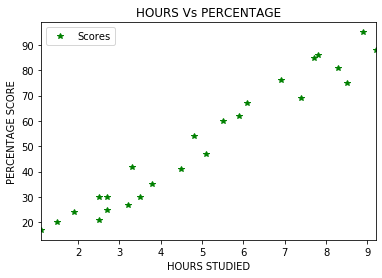

In [10]:
Hours.plot(x='Hours', y='Scores', style='*', color ='Green')  
plt.title('HOURS Vs PERCENTAGE')  
plt.xlabel('HOURS STUDIED')  
plt.ylabel('PERCENTAGE SCORE')  
plt.show()

From the graph above, we can clearly see that there is a positive linear correlation between the  percentage of score and number of hours studied. We can  also see that maximum study for 2.5 to 4 hours(approx) and maximum students score between 20 to 42(approx).



In [11]:
corr = Hours.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


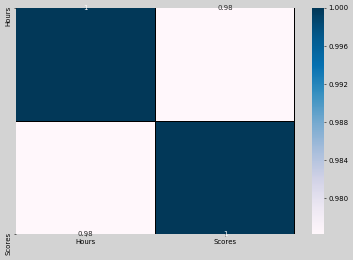

In [12]:
fig = plt.figure(num=None, figsize=(9,6), dpi=50, facecolor='LightGray')
annot_kws = {"ha": 'center',"va": 'center'}
sns.heatmap(data = corr, annot =True, annot_kws=annot_kws, cmap = 'PuBu', linewidths=0.1, linecolor='k')

# Preparing the data


In [13]:
#Spliting the data into "Attributes" (Inputs) and "Labels" (Outputs).
X = Hours.iloc[:, :-1].values  
Y = Hours.iloc[:, 1].values

In [14]:
#To split this data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
print("Training complete.")

Training complete.


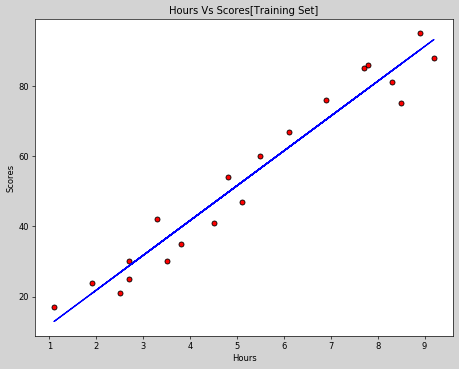

In [16]:
fig = plt.figure(num=None, figsize=(9,7), dpi=60, facecolor='LightGray')
# Plotting for the test data
plt.scatter(X_train, Y_train, color= "k", facecolor='Red')
plt.plot(X_train,regressor.predict(X_train),color="Blue")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Vs Scores[Training Set]')
plt.show()

# Visualising the Testing Set Result

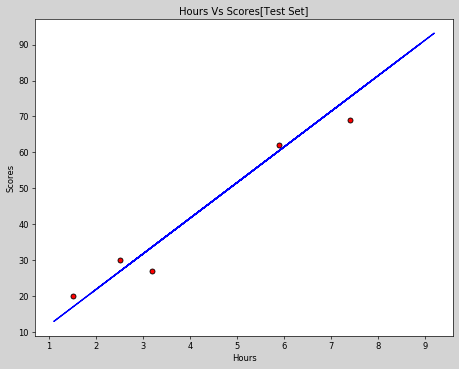

In [17]:
fig = plt.figure(num=None, figsize=(9,7), dpi=60, facecolor='LightGray')
# Plotting for the test data
plt.scatter(X_test, Y_test, color= "k", facecolor='Red')
plt.plot(X_train,regressor.predict(X_train),color="Blue")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Vs Scores[Test Set]')
plt.show()

# Predicting Score if a student studies for 9.25 hrs/day

In [18]:
Y_pred = np.round(regressor.predict([[9.25]]),2)
Y_pred

array([93.69])

We predict that if student studies for 9.25hrs/day he would end up scoring 94%

# Making Predictions


In [19]:
#Now that we have trained our algorithm
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error
R2 = r2_score(Y_test, Y_pred)
print('R2',R2)
MAE = mean_absolute_error(Y_test, Y_pred)
print('Mean Absolute Error', MAE)

R2 0.9454906892105355
Mean Absolute Error 4.183859899002975
